<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h1>SARIMAX AND NEURAL NETWORK FORECAST OF HOTEL OCCUPANCY</h1>
<h2>Research Question</h2>
<p>&nbsp; &nbsp; Travel and tourism is a continuously evolving business sector that is sensitive to
location, seasons, and global events. In 2024 alone, ten percent of the global GDP was
generated by 1.4 billion travelers (EHL Insights, 2025). The hospitality industry contains
incredible economic viability and is expected to increase revenue and customers in the
coming years. In this industry, there is an important priority to anticipate supply as
demand, which arises from a variety of factors, is naturally volatile. Having an adequate
number of resources leads to improved guest experience which in turn can lead to loyal
and repeat customers.

&nbsp; &nbsp; Occupancy is a baseline metric in calculating the performance and success of a hotel.
In an article published by Lacalle (2025) she notes that hotel occupancy is a “key role in
revenue management” and can be used in “craft[ing] pricing and marketing strategies” to
improve revenue. As it is a key performance indicator, this study will attempt to predict the
oncoming guest count of hotels to understand market demand and measure business
viability. More specifically, this research project will explore the answer to the question,
“Can a time series forecast reasonably predict a hotel’s guest occupancy?” using SARIMAX
and neural networks. The results of this analysis will be determined by the null(H0) and
alternative hypothesis(H1) listed below:

&nbsp; &nbsp; &nbsp; H0: A time series forecast cannot predict the occupancy of a hotel on a given day.

&nbsp; &nbsp; &nbsp; H1: A time series forecast can predict the occupancy of a hotel within a mean absolute
percentage error of less than 20%.</p>

<h2>Data Collection</h2>
<p>&nbsp; &nbsp; This analysis project will be using data provided by user Mesum Raza Hemani on the
Data.World website. Data.World is simple and a great resource for finding collections of
data, however, this ease-of-use comes with the drawback of users being able to upload
datasets and information without proper documentation. The site, even with all of its
advantages, is bloated by these poor data sources, is difficult to navigate, and requires an
account to begin browsing. These issues are not limited to just Data.World but are common
among other online resources or public databanks that contain open data like Github or
Kaggle. Disadvantages aside, there are some benefits to using public databanks such as
the accessibility of information which can encourage collaboration and potentially “build a
community around the data” where analysts can exchange techniques and ideas regarding
a particular dataset (Edmiston et al., 2021). Choosing to use open data for this study meant
data would be easy to find and access, but it would require a significant amount of time to
find properly formatted data suitable for analysis.

&nbsp; &nbsp; The database itself is a downloadable CSV file named ‘hotel_bookings.csv’ with
119,390 rows and 32 columns where each row represents a guest’s reservation, and the
details associated with their stay. The entire dataset ranges from July 1st, 2015 to
September 14th, 2017 so there are two annual periods that are usable in the analysis. Since
the data is in a limited time frame, values closer to the start and end of the time period will
not account for all of the values within that period. There is likely data that exists before and
after the creation of the database and the time period will need to be further restricted for
analysis. Another limiting factor to note regarding this dataset is that data is anonymized
meaning the locations of the hotels are not provided. This could present difficulty in a time
series analysis as the hemisphere of the hotel’s location (which is relevant to the hotel’s
seasonality) is unknown and any relevant events that could attract guests are not easily
discerned. Fortunately, this restriction is not majorly impactful as the study is more
focused on forecasting rather than an analysis of the time series so there are no changes
necessary. Besides the limitations, the information in the data is thorough and properly
labeled as shown in the following data table:
</p>
<table>
<thead>
    <th>Variable</th>
    <th>Data Type</th>
    <th>Description</th>
</thead>
<tbody>
<tr>
<th>hotel</th>
<td>Categorical</td>
<td>Indicates whether the reservation
is at a city or resort style hotel.</td>
</tr>
<tr>
<th>is_canceled</th>
<td>Categorical</td>
<td>Signifies if the reservation iscanceled.</td>
</tr>
<tr>
<th>lead_time</th>
<td>Continuous</td>
<td>Length of time between making
the reservation and arriving at the
hotel, in days.</td>
</tr>
<tr>
<th>arrival_date_year</th>
<td>Continuous</td>
<td>The year of the arrival date.</td>
</tr>
<tr>
<th>arrival_date_month</th>
<td>Categorical</td>
<td>The month of the arrival date.</td>
</tr>
<tr>
<th>arrival_date_week_number</th>
<td>Categorical</td>
<td>The week of the year of the arrival
date.</td>
</tr>
<tr>
<th>arrival_date_day_of_month</th>
<td>Continuous</td>
<td>The day of the month of the
arrival date.</td>
</tr>
<tr>
<th>stays_in_weekend_nights</th>
<td>Continuous</td>
<td>The number of weekend nights
the guest will stay.</td>
</tr>
<tr>
<th>stays_in_week_nights</th>
<td>Continuous</td>
<td>The number of weeknights the
guest will stay.</td>
</tr>
<tr>
<th>adults</th>
<td>Continuous</td>
<td>Number of adults for the
reservation.</td>
</tr>
<tr>
<th>children</th>
<td>Continuous</td>
<td>Number of children for the
reservation.</td>
</tr>
<tr>
<th>babies</th>
<td>Continuous</td>
<td>Number of babies in the reservation.</td>
</tr>
<tr>
<th>meal</th>
<td>Categorical</td>
<td>The meal type booked for the
reservation.</td>
</tr>
<tr>
<th>babies</th>
<td>Continuous</td>
<td>Number of babies in the reservation.</td>
</tr>
<tr>
<th>country</th>
<td>Categorical</td>
<td>The guest’s country of origin.</td>
</tr>
<tr>
<th>market_segment</th>
<td>Categorical</td>
<td>The market segment a guest
belongs to.</td>
</tr>
<tr>
<th>distribution_channel</th>
<td>Categorical</td>
<td>Which channel the reservation
was made with.</td>
</tr>
<tr>
<th>is_repeated_guest</th>
<td>Categorical</td>
<td>Signifies if a guest has stayed at
the hotel prior.</td>
</tr>
<tr>
<th>previous_cancellations</th>
<td>Continuous</td>
<td>The number of cancellations the
guest has previously made.</td>
</tr>
<tr>
<th>reserved_room_type</th>
<td>Categorical</td>
<td>The type of room initially reserved
for the guest.</td>
</tr>
<tr>
<th>assigned_room_type</th>
<td>Categorical</td>
<td>The type of room actually assigned to the guest.</td>
</tr>
<tr>
<th>booking_changes</th>
<td>Continuous</td>
<td>The number of changes made to
the reservation.</td>
</tr>
<tr>
<th>deposit_type</th>
<td>Categorical</td>
<td>The deposit type for the
reservation.</td>
</tr>
<tr>
<th>agent</th>
<td>Categorical</td>
<td>The travel agent’s ID that made
the reservation (if booked through
a travel agent).</td>
</tr>
<tr>
<th>company</th>
<td>Categorical</td>
<td>The company’s ID that made the
reservation (if booked via a
company).</td>
</tr>
<tr>
<th>days_in_waiting_list</th>
<td>Continuous</td>
<td>The length of time between a
reservation put on the waiting list
and being confirmed, in days.</td>
</tr>
<tr>
<th>customer_type</th>
<td>Categorical</td>
<td>The type of customer and their relationship with the hotel.</td>
</tr>
<tr>
<th>adr</th>
<td>Continuous</td>
<td>The average daily rate (per room)
of the reservation.</td>
</tr>
<tr>
<th>required_car_parking_spaces</th>
<td>Continuous</td>
<td>The number of parking spaces
needed by the guest for the
reservation.</td>
</tr>
<tr>
<th>total_of_special_requests</th>
<td>Continuous</td>
<td>The number of special requests
made for the reservation.</td>
</tr>
<tr>
<th>reservation_status</th>
<td>Categorical</td>
<td>The status of the reservation as of
the last database update.</td>
</tr>
<tr>
<th>reservation_status_date</th>
<td>Continuous</td>
<td>The latest date the reservation
status was checked.</td>
</tr>
</tbody>
</table>

<h2>Data Extraction and Preparation</h2>
<p>&nbsp; &nbsp; The extraction process began by downloading the previously mentioned CSV file
and placing it in the same folder as the Python code file used to execute the project. Python
is a programming language known for its user-friendly syntax and versatility which makes it
an incredibly popular tool for many kinds of projects. Some advantages of this language in
relation to the field of data analytics are the libraries that enable the manipulation of large
datasets and the use of ready-made algorithmic models. Popular libraries include Pandas
which enables the storage of datasets as variables in code, Matplotlib which allows the
creation and visualization of graphs, and Scikit-learn which provides supporting formulas
for preparing and analyzing data. In relation to the extraction and preparation process, the
only disadvantage this language provides is the slowed speed when formatting the data in
appropriate columns.</p>
<h3>Data Exploration</h3>
<p>&nbsp; &nbsp; Before the data can be cleaned or prepared, it first must be explored. Analyzing the
data as is reveals problematic factors that will need to be addressed in the preparation
process. The shape, cell count, and sparsity were calculated to understand the quality of
the data.</p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats.mstats import winsorize
import numpy as np
from datetime import timedelta
from functools import partial
from pmdarima.preprocessing import FourierFeaturizer
from pmdarima.arima import auto_arima
# makes tensorflow depreciation warnings quiet [In-Text Citation: (user1315789 & Freeman, 2020)]
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
from keras_tuner import RandomSearch
from keras.models import Sequential, load_model #type: ignore
from keras.layers import Dense, LSTM, Dropout #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore


class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
class arima_values:
   def __init__(self, fourier, seasonality, D, m):
      self.fourier = fourier
      self.season = seasonality
      self.D = D
      self.m = m

df = pd.read_csv('hotel_bookings.csv')

print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)

# region Explore data
print(text.UNDERLINE + "Explore Data" + text.END)
cell_count = df.shape[0] * df.shape[1]
missing_count = sum(df.isna().sum())
print(f"Shape: {df.shape}")
print(f"Cell Count: {"{:,}".format(cell_count)}")
print(f"Missing Cell Count: {"{:,}".format(missing_count)}")
print(f"Sparsity: {round(((missing_count/cell_count) * 100), 2)}%")


-- Begin Data Analytics --

Explore Data
Shape: (119390, 33)
Cell Count: 3,939,870
Missing Cell Count: 129,425
Sparsity: 3.29%


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; There is a sparsity of 3.29% meaning it is of good quality and suitable for machine
learning. Following this, the data types are listed to ensure correct formatting.</p>

In [4]:
# Data types
print("\nData Types: ")
print(df.dtypes)


Data Types: 
index                               int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type        

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The results indicate the ‘children’, ‘agent’, and ‘company’ are float values when they
should be integer values. Next, the program displays the number of rows with exact
duplicates. Duplicated rows indicate a mistaken copy of data and will be removed if
present.</p>

In [5]:
# Check Duplicates
print("\nExact row duplicates: ", len(df)-len(df.drop_duplicates()))
df.drop_duplicates()


Exact row duplicates:  0


,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; There are no duplicated rows present. In some circumstances, specific variables are
checked for duplicated values within their own column when every value is required to be
unique, however, no such column in this database has a requirement for unique values.
The next step involves viewing which columns contain missing values.</p>

In [6]:
# Missing Values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The majority of missing values come from the ‘agent’ and ‘company’ because not
every hotel patron uses a company or agent to make a hotel reservation. Regardless, there
should still be a value listed indicating no third party agency was used. The missing values
in ‘country’ and ‘children’ are not of much concern as they are also irrelevant to the project,
but they will still be corrected in the cleaning phase. Numeric values will be analyzed in the
following step to check for potential outliers.</p>

In [7]:
def describe_vars(list):
   """Describe Vars: 
      Used to describe variables and to visually check for outliers. 


      Compare min and max to each other.
      Compare if 25% is close to min and if 75% is close to max.
      Consider where the information was obtained.
   """
   split = int(len(list)/2)
   first_half = list[:split]
   second_half = list[split:]
   print(str(df[first_half].describe()))
   print(str(df[second_half].describe()))
# Check for Outliers
numeric_list = ['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
print("Checking for Outliers")
describe_vars(numeric_list);

Checking for Outliers
           lead_time  arrival_date_year  arrival_date_day_of_month  \
count  119390.000000      119390.000000              119390.000000   
mean      104.011416        2016.156554                  15.798241   
std       106.863097           0.707476                   8.780829   
min         0.000000        2015.000000                   1.000000   
25%        18.000000        2016.000000                   8.000000   
50%        69.000000        2016.000000                  16.000000   
75%       160.000000        2017.000000                  23.000000   
max       737.000000        2017.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.00

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; ‘arrival_date_year’, ‘arrival_date_day_of_month’, 'required_car_parking_spaces’, and
‘total_of_special_requests’ all have reasonable values and could not be considered to have
an outlier. ‘adults’ and ‘adr’ contain nonsensical minimum values that will be raised as at
least one adult is necessary to book a reservation and the average daily rate cannot be
negative. ‘stays_in_weekend_nights’ and ‘stays_in_week_nights’ have values that seem high
but are logical when combined; a guest with a long reservation will have big counts of both
as shown below when viewing high values: </p>

&nbsp; &nbsp; <img src="Images/Stays in Week Nights Comparison.png" alt="Visual of stays_in_weekend_nights and stays_in_week_nights comparison" />

<p>&nbsp; &nbsp; 'lead_time’, ‘children’, ‘babies’, ‘previous_cancellations’, ‘booking_changes’,
‘days_in_waiting_list’, and ‘adr’ all have suspiciously large values. However, removing
outliers from most of these columns will result in all values in the column being zero. To
minimize the increase of sparsity in the dataset, only ‘lead_time’ and ‘adr’ will be treated for
outliers. The last exploratory step involves viewing the values of categorical variables to
ensure they are reasonable values. As this database lacks a data dictionary or a connected
data table, only one’s best judgment can be used.</p>

In [8]:
def view_categorical_values(cols):
    """View Categorical Values: 
        Used to visually check unique values for categorical columns. 


        Ensure the values align with what is stated in the dictonary
    """
    for col in cols:
      temp = df[col].unique()[pd.notna(df[col].unique())]
      temp.sort()
      print(f"{col}: " + str(temp))
# Check Categorical Columns Values
print("\nCategorical Values")
categorical_list = ['hotel', 'is_canceled', 'arrival_date_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel',
                     'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type']
view_categorical_values(categorical_list)


Categorical Values
hotel: ['City Hotel' 'Resort Hotel']
is_canceled: [0 1]
arrival_date_month: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
arrival_date_week_number: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['ABW' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATA' 'ATF' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BOL' 'BRA' 'BRB' 'BWA' 'CAF' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'CN' 'COL'
 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'GAB' 'GBR'
 'GEO' 'GGY' 'GHA' 'GIB' 'GLP' 'GNB' 'GRC' 'GTM' 'GUY' 'HKG' 'HND' 'HRV'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JEY'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KHM' 'KIR' 'KNA' 

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Every category is logical based on the variable’s description. There is a peculiarity of the
‘company’ values beginning at six, but this can be explained by the fact that the data is
within a limited time frame and no other linked data table is provided.</p>
<h3>Data Cleaning</h3>
<h4>Missing Values</h4>
<p>&nbsp; &nbsp; The undefined values in ‘agent’, ‘company’, are replaced with zero to signify no agent or
company was used in the booking process. The four missing values in ‘children’ are also
replaced with zero as the majority of the values, up to the 75th percentile, are zero. Values
missing in the ‘country’ column will be replaced with ‘UNK’ to represent that the country of
origin is unknown.</p>

In [9]:
# region Clean Data
print(text.UNDERLINE + "Clean Data" + text.END)
# Missing Values
df.fillna({'agent': 0}, inplace=True)
df.fillna({'company': 0}, inplace=True)
df.fillna({'children': 0}, inplace=True)
df.fillna({'country': 'UNK'}, inplace=True)
print("Missing Values:")
print(df.isna().sum())

Clean Data
Missing Values:
index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
c

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>Incorrect Data Types</h4>
<p>&nbsp; &nbsp; With their missing values now filled in, the data types of ‘children’ ‘agent’ and ‘company’
are converted into integers.</p>

In [10]:
# incorrect data types
print("\nData Types: ")
df = df.astype({'children': 'int64', 'agent': 'int64', 'company': 'int64'})
print(df[['children', 'agent', 'company']].dtypes)


Data Types: 
children    int64
agent       int64
company     int64
dtype: object


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>Outliers</h4>
<p>&nbsp; &nbsp; As detailed above, the ‘adults’ and ‘adr’ columns will have their minimum values
changed to one and zero respectively. ‘lead_time’ and ‘adr’ columns will undergo treatment
for outliers with the Interquartile Range(IQR) method. This method finds range of values
that fall between the 25th and the 75th percentile, multiples that value by the threshold
amount of 1.5, then subtracts that value from the 25th percentile (lower bound) and adds
that value to the 75th percentile (upper bound). Any values that are beyond the lower and
upper bound are considered outliers. This technique was selected because it is “robust to
skewed data distributions” which variables with outliers tend to be (Patil, 2023). There are
caveats to this method as the IQR method does not work well when multiple percentile
quarters are the same value; this is the reason why other columns like ‘children’, ‘babies’,
and ‘previous_cancellations’ are exempt from this treatment.

&nbsp; &nbsp; Once the outliers are determined, their values are imputed with the median value of the
variable as imputation with the mode of values is more suited towards categorical and
ordinal data and, according to Vaj (2024), mean value imputation is more sensitive to
outliers.
</p>

In [11]:
def treat_outliers(col):
   """Treat Outliers: 
      Used to treat outliers using IQR. 
   """
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
   print(f"Outlier Count for {col}: {len(outliers)}")
   if df[col].dtype == 'int64':
      df.loc[outliers.index, col] = int(df[col].median())
   else:
      df.loc[outliers.index, col] = df[col].median()
# Outliers
print("\nOutliers:")
outlying_vars = ['lead_time', 'adr']
df.replace({'adults': 0}, 1, inplace=True)
df.loc[df["adr"] < 0] = 0
for var in outlying_vars:
   treat_outliers(var)
outlying_vars.append('adults')
describe_vars(outlying_vars)
df.to_csv('clean_df.csv', index=False)


Outliers:
Outlier Count for lead_time: 3005
Outlier Count for adr: 3793
           lead_time
count  119390.000000
mean       94.575961
std        91.416592
min         0.000000
25%        18.000000
50%        69.000000
75%       150.000000
max       373.000000
                 adr         adults
count  119390.000000  119390.000000
mean       96.958490       1.859762
std        39.966383       0.571317
min         0.000000       0.000000
25%        69.290000       2.000000
50%        94.567500       2.000000
75%       120.000000       2.000000
max       211.030000      55.000000


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>Data Preparation</h4>
<p>&nbsp; &nbsp; As stated above, the purpose of this study is to forecast a hotel’s occupancy in
terms of reservations on a given day. To accomplish this, the data must transform into an
appropriate time series format containing just two variables: ‘Hotel_Occupancy’ and ‘Date’.
The first step in this process involves removing all rows where the reservation is cancelled
as these bookings do not add to a hotel’s capacity and to remove variables that are
irrelevant to the data preparation process.</p>

In [12]:
# remove canceled reservations
prepared_df = df[df['is_canceled'] == 0]
# keep only relevant variables
prepared_df = prepared_df.filter(items=[
   'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 
   'stays_in_weekend_nights', 'stays_in_week_nights'])

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Next, ‘arrival_date_year’, ‘arrival_date_month’, and ‘arrival_date_day_of_month’ are
combined into one variable named ‘arrival_date’. Likewise, ‘stays_in_weekend_nights’ and
‘stays_in_week_nights’ values are added together as a new variable called ‘length_of_stay’.</p>

In [13]:
# create dictionary for months
dictionary = {'January':1, 
     'February':2, 
     'March':3, 
     'April':4, 
     'May':5, 
     'June':6, 
     'July':7, 
     'August':8, 
     'September':9, 
     'October':10, 
     'November':11, 
     'December':12 }                 
arrival_date_df = pd.DataFrame({
   'year': prepared_df['arrival_date_year'],
   'month': prepared_df['arrival_date_month'].map(dictionary),
   'day': prepared_df['arrival_date_day_of_month']
})
# convert arrival dates to appropriate format
prepared_df['arrival_date'] = pd.to_datetime(arrival_date_df[['year', 'month', 'day']])
prepared_df['length_of_stay'] = prepared_df['stays_in_weekend_nights'] + prepared_df['stays_in_week_nights']

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Using these two new variables, the last date of a guest’s reservation is calculated as a
variable called ‘leave_date’.</p>

In [14]:
print(text.UNDERLINE + "\nPrepare Data" + text.END)
prepared_df['leave_date'] = prepared_df['arrival_date'] + prepared_df['length_of_stay'].map(timedelta)
print("Resulting Columns:")
print(prepared_df.columns)


Prepare Data
Resulting Columns:
Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'arrival_date', 'length_of_stay', 'leave_date'],
      dtype='object')


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Given that there are two kinds of hotels, ‘City’ and ‘Resort’ types, the data is split by
these two categories and will be forecasted separately. This will be beneficial in predicting
hotel occupancy as the hotel types could have different volumes, patterns or trends that
are otherwise muddled when the hotels are combined. Furthermore, performing a
Wilcoxon Rank-Sum test (shown further below) on the prepared ‘City’ and ‘Resort’ hotel occupancies, a test that
indicates whether ‘the medians of two populations differ’, reveals a p-value of 2.04 x 10-67
(Ford, 2017). The p-value far surpasses the testing metric of 0.05 meaning the alternative
hypothesis of the test is true and occupancy of these hotels significantly differ from one
another.</p>

In [15]:
# split the data by hotel type
city_df = prepared_df[prepared_df['hotel'] == 'City Hotel']
resort_df = prepared_df[prepared_df['hotel'] == 'Resort Hotel']

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The next step involves setting a time range to view the dataset. Since the data is
within a limited time range, reservations made before or after the data is collected cannot
count towards a hotel’s occupancy meaning the date range should start later than the first
date and end earlier than the last. The range of dates in the time series will start two weeks
from the first date, July 15th, 2015, and end on the last arrival date, August 31st, 2017. These
values were picked to maintain a two-year period of data while minimizing the amount of
data excluded.</p>


In [16]:
# time series starts 2 weeks after 1st date b/c reservations before db start are not reflected
starting_date = prepared_df['arrival_date'].min() + timedelta(days=14)
entire_date_range = pd.date_range(start = starting_date, end = prepared_df['arrival_date'].max())

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Now that the date range is officially decided, the time series requires its dependent
variable: the occupancy of a hotel type on a given day. This is accomplished by looping over
every day in the date range and finding the number of rows in the data frame that have this
date within their arrival date and leave date range.</p>

In [17]:
def find_daily_occupancy(data, date_range):
   """
   find_daily_occupancy: counts the amount of people at the hotel on a given day
   """
   # initialized with 0 so every day has a value
   occupancy_series = pd.Series(0, index=date_range)
   for date in date_range:
      occupancy = data.loc[(data['arrival_date'] <= date) & (data['leave_date'] >= date)]
      occupancy_series[date] = len(occupancy)
   return occupancy_series
# occupancy is split by hotel type for Wilcoxon Rank-Sum Test
city_occupancy = find_daily_occupancy(city_df, entire_date_range)
resort_occupancy = find_daily_occupancy(resort_df, entire_date_range)
# Wilcoxon Rank-Sum Test
print("Wilcoxon Rank-Sum Test (Mann-Whitney test):")
stat, p_val = mannwhitneyu(city_occupancy, resort_occupancy)
print(f"statistic: {stat}, p-value: {p_val}")
if p_val < 0.05:
   print(f"p < 0.05 so the alternative hypothesis is " + text.BOLD + "true" + text.END + ".")
else:
   print(f"p > 0.05 so the null hypothesis is " + text.BOLD + "true" + text.END + ". ")
print(f"The samples have values that are distributed {"differently" if p_val < 0.05 else "similarly"}.")

Wilcoxon Rank-Sum Test (Mann-Whitney test):
statistic: 456383.0, p-value: 1.647127228870737e-66
p < 0.05 so the alternative hypothesis is true.
The samples have values that are distributed differently.


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Checking the results of this step reveals there are no days without guests for both
hotel types and the hotels have a wide range of occupancy.</p>

In [18]:
print("\nDays without Guests")
print(f"City Hotel: {city_occupancy[city_occupancy == 0].count()}")
print(f"Resort Hotel: {resort_occupancy[resort_occupancy == 0].count()}")
print('\nCity Hotel Occupancy Detailed:')
print(city_occupancy.describe())
print('Resort Hotel Occupancy Detailed:')
print(resort_occupancy.describe())


Days without Guests
City Hotel: 0
Resort Hotel: 0

City Hotel Occupancy Detailed:
count    779.000000
mean     231.571245
std       73.603789
min       24.000000
25%      190.500000
50%      260.000000
75%      283.000000
max      350.000000
dtype: float64
Resort Hotel Occupancy Detailed:
count    779.000000
mean     187.340180
std       43.754733
min       49.000000
25%      170.500000
50%      204.000000
75%      215.500000
max      280.000000
dtype: float64


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; This next step is the final preparation step before the data is transformed separately
based on time series forecasting model tested. As the hotel occupancy is a new variable
with a wide range of values, the winsorization method will be applied to “minimize the
influence of outliers” in the time series (Leonardo, 2016). Winsorization replaces the
highest and lowest n percent of values with the nth percentile value. The winsorization limits
of this study are set to 0.02 meaning values below the 2nd and 98th percentile will be
replaced by the values at the 2nd and 98th percentile respectively. According to Bevilacqua
(2024), this method is fantastic in adding robustness to the data allowing the predictive
models to train more accurately, but risks oversimplification and introducing value bias
which is why this project’s limit is set to only 0.02.</p>

In [19]:
# winsorize outliers
# means the top/bottom 2% are replaced with the 2nd/98th percentile
winsorize_limits = 0.02
winsorize(city_occupancy, limits=[winsorize_limits, winsorize_limits], inplace=True)
winsorize(resort_occupancy, limits=[winsorize_limits, winsorize_limits], inplace=True)
print("\nAfter Winsorization")
print('City Hotel Occupancy Detailed:')
print(city_occupancy.describe())
print('Resort Hotel Occupancy Detailed:')
print(resort_occupancy.describe())
city_occupancy.to_csv('city.csv', index_label='Date', header=['Hotel Occupancy'])
resort_occupancy.to_csv('resort.csv', index_label='Date', header=['Hotel Occupancy'])
prepared_df.to_csv('prep_df.csv', index=False)


After Winsorization
City Hotel Occupancy Detailed:
count    779.000000
mean     231.668806
std       72.647550
min       51.000000
25%      190.500000
50%      260.000000
75%      283.000000
max      325.000000
dtype: float64
Resort Hotel Occupancy Detailed:
count    779.000000
mean     187.222080
std       42.838709
min       75.000000
25%      170.500000
50%      204.000000
75%      215.500000
max      240.000000
dtype: float64


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Analysis</h2>
<h3>Exploratory Analysis on Prepared Data</h3>
<p>&nbsp; &nbsp; With the data now appropriately structured, further exploration is necessary for
finding important factors to consider for neural network and SARIMAX models. Examining
seasonality, patterns, and trends of the time series before forecasting is an important step
in the analysis process. Numerical metrics can describe how well a model fits with the
data, but they cannot consider the possibility of the model overfitting to one specific
pattern. This is why time series visualization is so important as it allows the analyst
themselves to predict what future values should be and understand what results could
qualify as overfitting. This first visualization is a double line graph of the city and resort
hotel’s occupancy over the entire time series.</p>


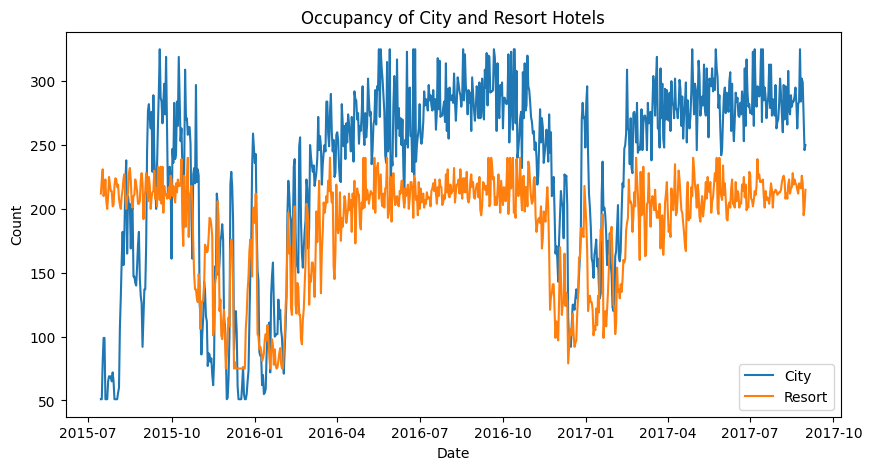

In [20]:
# line graph occupancy of both hotel types
plt.figure(figsize=(10, 5)) 
plt.plot(city_occupancy.index, city_occupancy, label='City')
plt.plot(resort_occupancy.index, resort_occupancy, label='Resort')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.title('Occupancy of City and Resort Hotels')
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; As determined by the Wilcoxon Rank-Sum test, these hotel types do have differing data
distributions with city hotels having higher volumes than resorts, however, both hotel types
follow the same trends and patterns. From just looking at this plot alone, it is clear there is
an annual seasonality. This aligns with Foreman’s (2025) description of the typical
fluctuations of the hotel industry where hotel occupancy over time can be categorized
between off-season, shoulder season, and peak season patterns.</p>
<img src="Images/Hospitality Seasonality.png" alt="Visual of the Seasonality Patterns of Hotel Occupancy" />

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Aside from the annual patterns, there is noticeable volatility in the day-to-day hotel
occupancy and a slight upwards trend when comparing the 2016 off-season dip to the
2017 off-season. While no locations were provided for these hotels, given that the peak
season revolves around June to September and hotels tend to have a “peak season in the
summer”, it can be presumed that this hotel is in the northern hemisphere (Foreman,
2025). Next, the city and hotel types are tested for normality using a Q-Q plot.</p>

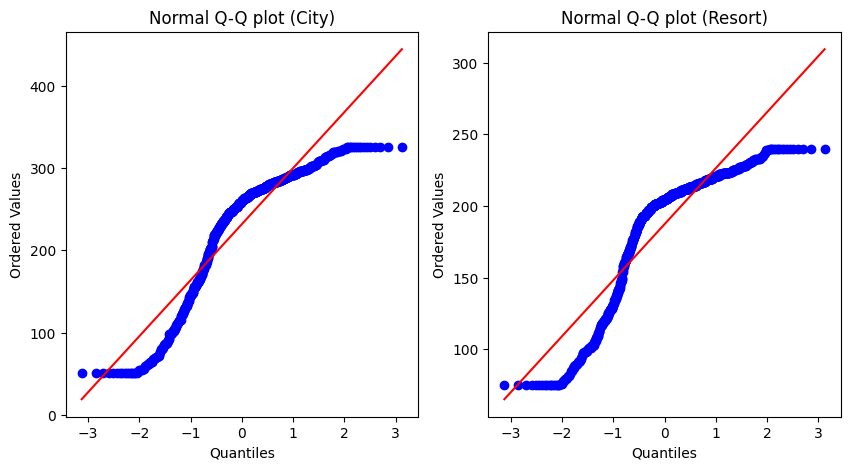

In [21]:
# checking for normality with q-q plot
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)
stats.probplot(city_occupancy, dist="norm", plot=plt,)
plt.title('Normal Q-Q plot (City)')
plt.xlabel('Quantiles')
plt.ylabel('Ordered Values')
plt.subplot(1, 2, 2)
stats.probplot(resort_occupancy, dist="norm", plot=plt)
plt.title('Normal Q-Q plot (Resort)')
plt.xlabel('Quantiles')
plt.ylabel('Ordered Values')
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; A Q-Q plot, when used for normalization, visualizes how close data is to following a
normal distribution. An ideally normal dataset would have the blue line aligning with the
red. Clearly, this is not the case for both hotel occupancy datasets. These blue line sprawls
indicate data that is over-dispersed as the “observed quantiles [are] more spread out or
deviating from the diagonal line” (Saxena, 2024). Given the volatility and positive trend of
the series, this was an expected outcome. The Wilcoxon Rank-Sum statistical test, a test
that does not assume a normal distribution of data, was applied earlier for this reason. In
terms of the forecasting models that will be applied to these datasets, experienced data
analyst Kolassa (2023) notes that normality scaling is not necessary for ARIMA style
models like SARIMAX while Hoque (2023) recommends normalization for neural networks
as it balances inputs and reduces model overfitting.

&nbsp; &nbsp; The last visualization before individual modeling techniques is a shape comparison
of the city and resort time series by comparing their normalized values.
</p>

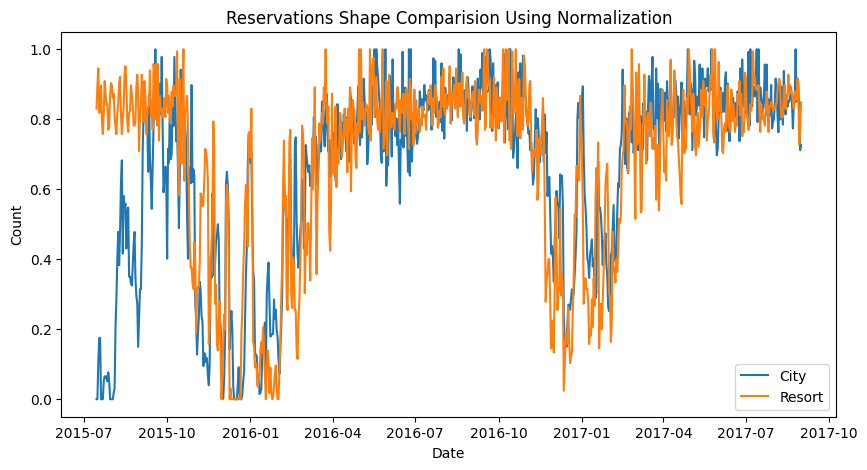

In [22]:
# looking for similarities in shape by min max normalization
scaler = MinMaxScaler()
normal_city = scaler.fit_transform(city_occupancy.values.reshape(-1, 1))
normal_resort = scaler.fit_transform(resort_occupancy.values.reshape(-1, 1))
plt.figure(figsize=(10, 5)) 
plt.plot(city_occupancy.index, normal_city, label='City')
plt.plot(resort_occupancy.index, normal_resort, label='Resort')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.title('Reservations Shape Comparision Using Normalization')
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The shapes of the line graphs are similar, but not quite the same. Furthermore, the
shapes are incredibly divergent in the beginning of the time series which can be attributed
to the dataset not containing reservations made prior to July 1st, 2015. Starting the time
series two weeks after the beginning of all reservations is not long enough and could be an
area of potential improvement for a future analysis.</p>
<h3>Forecasting with Neural Networks</h3>
<p>&nbsp; &nbsp; Neural networks are a form of machine learning that uses layers and nodes to train
on data. There are three essential components to the structure of this model: the input
layer which receives the training data, one or many hidden layers which process the data by
giving the input weights and adjusting as it learns, and the output layer which is used to
format the results into the correct shape. A neural network is adaptive, tends to work well
with new information and is easy-to-use with the Tensorflow and Keras libraries in Python.
The technique is also highly customizable, which is simultaneously advantageous and
disadvantageous. Tweaking models to diminish error is how the best models are
determined but it is hard to know what adjustments will improve accuracy when there are
countless options and combinations. Layer type, hidden layer count, node count per layer,
and activation function per layer are just a few of the choices an analyst needs to consider
when creating their model. Additionally, while neural networks are adaptive, how they work
with the data exactly is unknown; according to Donges (2023) some businesses tend to
avoid neural networks as their resulting output cannot be explained to their customers.
Forecasting hotel occupancy does not require an explanation of the neural network’s
decision-making so despite the model’s possible issues, a neural network is suitable for
this activity.

&nbsp; &nbsp; As previously stated in the last section, the time series will undergo normalization
using Min-Max scaler because it improves the training capacity of the neural network. Min-
Max Scaler is a technique that normalizes the data by placing all values within the range of
zero to one at an equal ratio to the original values. Since the highest and lowest values are
equivalent to zero and one, this method is sensitive to outliers. Even so, the Min-Max Scaler
method is specifically advantageous for a neural network because of the sigmoid
activation function. Sigmoid is typically used in the output layer of a neural network and is
“particularly useful in scenarios [with] … probabilities” because it outputs values in a range
of zero to one (Shukla, 2025). With normalized training data in the same range, the
predicted values will be in a comparable range and can be rescaled to reflect actual
forecasted amounts.

&nbsp; &nbsp; Next, the count of days necessary to set aside for testing is calculated. The final
20% of days in the time series will be used for testing as is recommended by industry
standards (Pramoditha, 2012). This equates to 156 days out of a total of 779. Knowing this
length of time is important as the final layer of the neural network will predict values for this
number of days meaning the forecasted amount of data over time is also this length.

&nbsp; &nbsp; For a time series forecast with a neural network, the data needs to be formatted in a
way that X (input) number of values are used to predict the next Y (output) values.
Brownlee’s (2020) time series forecasting tutorial provides a great visual representation of
how the training data is formatted:
</p>
<img src="Images/neural number format.png" alt="Visual of the numeric format needed for the neural network">
<p>&nbsp; &nbsp; In this instance, three input values (bottom left list) are trained to predict the next
two output values (bottom right list), and every row is a section of the original data (upper
image) shifted forward by one index value. This study’s forecast will use an input length of
425 days to allow the network to analyze two months more than the complete seasonal
period. The entire training set (623 days) is not used as the input length as it would severely
limit the training sample size and risk overfitting. As mentioned previously, the output
length will be equivalent to the length of the testing period of 156 days.

&nbsp; &nbsp; With all the data converted into the proper format, the best model will be calculated
with the Keras_Tuner library. This model optimizer sets 20% of the data aside for testing and
has a training epoch count of 50 which is managed by an early stopping method. To prevent
the model from overfitting to the training data, early stopping ends network training when
the validation loss, the difference between actual values and predicted values, begins to
increase.

&nbsp; &nbsp; The tuner itself runs for 250 trials and executes each trial three times. Every trial
tries a different combination of layers, layer nodes, activation functions and learning rate of
the model. This algorithm takes around 2½ hours to tabulate per hotel.

&nbsp; &nbsp; For every trial, this optimizer adds one long short-term memory (LSTM) layer and
one Dense output layer for correct formatting. The LSTM layer is an ideal layer for time
series forecasting because it “can capture long-term dependencies in sequential data”
(Chug, 2025). Time is sequential as it is linear and contains long-term dependencies in the
form of seasonal patterns. Optionally, a Dropout layer with a set rate, another LSTM, and up
to three other Dense layers are tested in the process with node values ranging from 32 to
512 in addition to a selection of a model learning rate and either a reLU or Swish activation
function.

&nbsp; &nbsp; The goal of the optimization process is to minimize the mean absolute percentage
error (MAPE) which is the metric of model measurement suggested in the alternative
hypothesis. Mean absolute percentage error finds the average difference between actual
values and predicted values and represents it as a percentage; a lower MAPE value could
indicate a better model. Because the resulting value is just a percentage, it is a metric that
can be used to compare models that do not have the same scale and is easy to interpret.
While it is dysfunctional when actual values are zero, this is not an issue for this analysis as
the preparation process revealed there are no day with zero occupancy for both hotels
(Gilbert, 2023).

After determining the best neural network from the options provided, the model and its
metrics are saved so the same results are generated each time the program is run.

&nbsp; &nbsp; With the models built, now the testing period and the next 156 days (Y length) can
be forecasted by using the occupancy values of the last 425 days (X length) before the
testing and forecasting period. The resulting data is rescaled to remove normalization and
reflect real values.
</p>

In [23]:
def graph_forecast_results(training, testing, test_predictions, forecast, hotel_type, test_type):
   """
   graph_forecast_results: graphs the results of forecasting and training the data
   """
   plt.figure(figsize=(10,6))
   plt.plot(training.index, training, label='Training')
   plt.plot(testing.index, testing, label='Testing')
   plt.plot(testing.index, test_predictions, label='Prediction of Test')
   plt.plot(forecast.index, forecast, label='Forecast')
   plt.xlabel('Date')
   plt.ylabel('Count')
   plt.legend(loc='upper left')
   plt.title(f'Forecast of {hotel_type} Hotel Occupancy ({test_type})')
def create_x_y(data, x_len, y_len):
   """
   create_x_y: creates x and y values for the time series.
      The x values are x_len lagged values of y where y_len is the amount of the values to be predicted.
   """
   x_list, y_list = [], []
   for i in range(len(data)): 
      x_end = i + x_len
      y_end = x_end + y_len
      if y_end > len(data):
         break
      # x_list is the amount of values used in prediction
      x_list.append(data[i:x_end])
      # y_list is the predicted values
      y_list.append(data[x_end: y_end])
   return np.array(x_list), np.array(y_list)
def build_model(hp, prediction_len):
   """
   build model: runs the designated amount of tests to find the most accurate neural network
   """
   extra_LSTM = hp.Int('lstm_layers', 1, 2)
   model = Sequential()
   if hp.Boolean('Dropout'):
      model.add(Dropout(rate=0.2, seed=101))
   for i in range(extra_LSTM):
      # last lstm does not return sequences
      if i + 1 != extra_LSTM:
         model.add(LSTM(hp.Int(f'LSTM_{i}',min_value=32,max_value=512,step=32), activation=hp.Choice(f'LSTM_activation_{i}', values=['relu', 'swish']), return_sequences=True))
      else:
         model.add(LSTM(hp.Int(f'LSTM_{i}',min_value=32,max_value=512,step=32), activation=hp.Choice(f'LSTM_activation_{i}', values=['relu', 'swish'])))
   for i in range(hp.Int('dense_layers', 0, 3)):
      model.add(Dense(hp.Int(f'dense_{i}',min_value=32, max_value=512,step=32), activation=hp.Choice(f'Dense_activation_{i}', values=['relu', 'swish'])))
   model.add(Dense(prediction_len, activation='sigmoid'))
   model.compile(optimizer=Adam(learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),
         loss='mae',
         metrics=['mean_absolute_percentage_error'])
   return model
def neural_network(hotel_data, type_name, model_dir, model_filename, metrics_filename):
   """
   neural_network: Creates or loads a neural network for the passed data
   """
   scaler = MinMaxScaler()
   normal_data = scaler.fit_transform(hotel_data.values.reshape(-1, 1))
   # https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
   # https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
   split_location = int(len(normal_data)*0.8) # the index where the data is split for testing/training
   y_len = len(normal_data) - split_location # length of testing data
   x_len = 425 # amount of lagged values to predict the next set of values (y_len)
   feature_count = 1 # only one feature tested since it is a time series
   X_train, y_train = create_x_y(normal_data, x_len, y_len)
   # change shape to be [samples, features, time steps(x_len)]
   X_train = X_train.reshape(len(X_train), feature_count, x_len)
   early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
   model = None
   metrics = None

   # loads in an existent model
   if os.path.isfile(model_filename) and os.path.isfile(metrics_filename):
      model = load_model(model_filename)
      csv = pd.read_csv(metrics_filename)
      metrics = pd.Series(data=csv.iloc[:, 1].values, index=csv.iloc[:, 0])
   else: 
      # find best model
      tunning_model = partial(build_model, prediction_len=y_len)
      # 20 trials with 3 executions per trial took ~9 mins for 1 hotel type
      # 100 trials with 5 executions per trial took ~2 hr 25 mins for 1 hotel type
      tuner = RandomSearch(
         tunning_model,
         objective='mean_absolute_percentage_error',
         max_trials=250, 
         executions_per_trial=3,
         directory=model_dir,
         project_name='my_model'
      )
      tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])
      print(tuner.results_summary(num_trials=3))
      # get best hyperparameters, not best model [In-Text Citation: (Kashyap, 2024)]
      best_hp = tuner.get_best_hyperparameters()[0]
      model = tuner.hypermodel.build(best_hp)
      print()
      history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])
      stopped_epoch = early_stopping.best_epoch
      metrics = pd.Series({
      'MAPE': history.history['mean_absolute_percentage_error'][stopped_epoch],
      'Loss': history.history['loss'][stopped_epoch],
      })
      metrics.to_csv(metrics_filename)
      model.save(model_filename)

   # inspect results
   print()
   print(model.summary())
   print("\nModel Evaluation")
   print(f'Mean Absolute Percentage Error Score: {round(metrics['MAPE'], 3)} %')
   print(f"Loss: {round(metrics['Loss'], 3)}")
   print()

   # make predictions
   # need the last x_len values before split to make a prediction of the test data
   X_test = normal_data[(split_location-x_len):split_location]
   # value is 1 because only one sequence is passed to predict testing values
   X_test = X_test.reshape(1, feature_count, x_len)
   y_pred = model.predict(X_test)
   y_pred = scaler.inverse_transform(y_pred)
   # need last x_len values to make forecast
   forecast_input = normal_data[-x_len:]
   forecast_input = forecast_input.reshape(1, feature_count, x_len)
   forecast_pred = model.predict(forecast_input)
   forecast_pred = scaler.inverse_transform(forecast_pred)
      
   # graph results
   training = hotel_data[:split_location]
   testing = hotel_data[split_location:]
   test_predictions = pd.Series(data=y_pred[0], index=hotel_data.index[split_location:(split_location+y_len)])
   forecast = pd.Series(data=forecast_pred[0], index=pd.date_range(start = hotel_data.index[-1], periods=y_len))
   graph_forecast_results(training, testing, test_predictions, forecast, type_name, "Neural Network")
   plt.show()

   return test_predictions, forecast, round(metrics['MAPE'], 3)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; This is the model layout and results of the city hotel neural network with a MAPE of 12.982%:</p>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 448)            │     1,566,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 448)            │       201,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 156)            │        70,044 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,512,214 (21.03 MB)

 Trainable params: 1,837,404 (7.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,674,810 (14.02 MB)

None

Model Evaluation
Mean Absolute Percentage Error Score: 12.982 %
Loss: 0.069

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


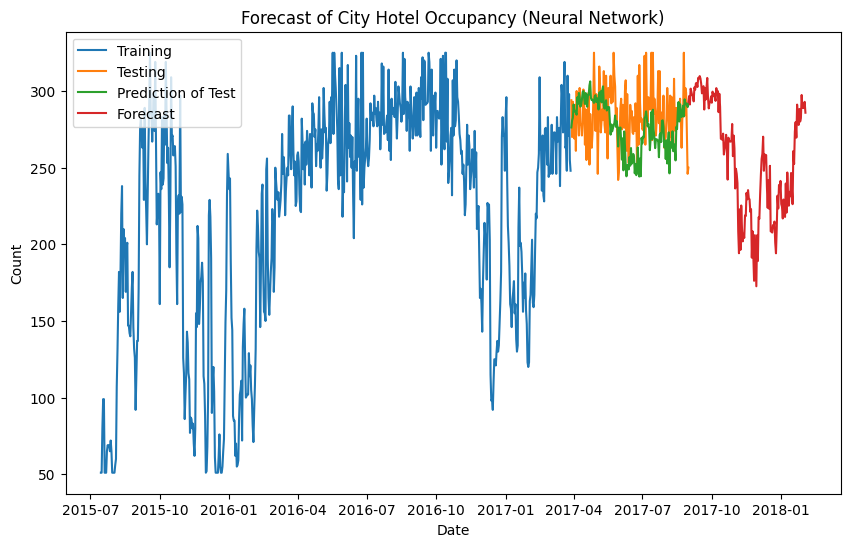

In [24]:
(c_neural_test, c_neural_forecast, 
 c_neural_mape) = neural_network(city_occupancy, 'City', 'city_model_dir', 'City_Model.keras', 'City_Metrics.csv')

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The predictive values of the testing period are less volatile and not as accurate in the
patterns of the actual data. The forecasted section, however, does contain the same off-
season pattern seen in the beginning of 2016 and 2017 as well as the rising trend captured
by these dips.

&nbsp; &nbsp; This is the model layout and results of the resort hotel neural network with a MAPE of
25.187%:
</p>

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 320)            │       954,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 156)            │        80,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,597,782 (13.72 MB)

 Trainable params: 1,199,260 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,398,522 (9.15 MB)

None

Model Evaluation
Mean Absolute Percentage Error Score: 25.187 %
Loss: 0.102

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


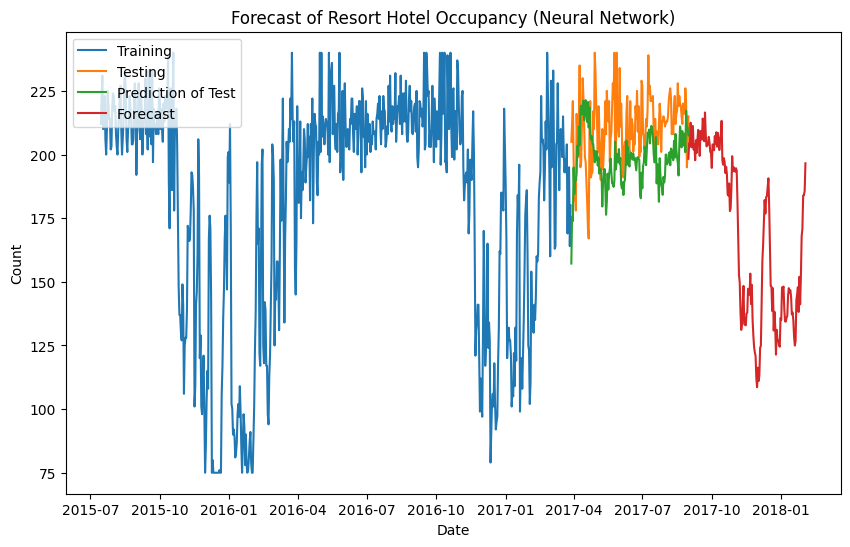

In [25]:
(r_neural_test, r_neural_forecast, 
 r_neural_mape) = neural_network(resort_occupancy, 'Resort', 'resort_model_dir', 'Resort_Model.keras', 'Resort_Metrics.csv')

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The resort neural network also struggles to capture an accurate reflection of the
testing time period and is more linear and varied in the forecasting period when compared
to the city hotel’s forecasting period. The resort hotel’s forecasted period also captures the
general shape but loses the instability seen in daily fluctuations.</p>
<h3>Forecasting with SARIMAX</h3>
<p>&nbsp; &nbsp; SARIMAX is an acronym for seasonal autoregressive integrated moving average with
exogenous regressors. It is a forecasting model that enables an analyst to use an ARIMA
model, a predictive model that combines past values, differencing and forecasting errors,
to account for seasonality and other external factors. SARIMAX’s ability to incorporate
outside influences is advantageous in capturing complex relationships outside of time and
the dependent variable, yet it is also a drawback as it requires the analyst to have “detailed
knowledge” of the external influences and is overall trickier to tune (A, 2024).
Like the neural network method of prediction, there exists a tuner for ARIMA models
(auto_arima from the pmdarima library) that eliminates the need to manually test the time
series data for the best order values. These values include p, d, q for the normal ARIMA
model and P, D, Q, m for the seasonal component of the algorithm. Regardless of
automation the tuner provides, a time series analysis will still be conducted to estimate the
best SARIMAX values. Since there are two time series, the analysis for the city set will be
done followed by the resort set.</p>
<h4>City Time Series Analysis</h4>
<p>&nbsp; &nbsp; First the time series is tested for stationarity using the Augmented Dickey-Fuller
(ADF) test. A stationary time series represents data with a constant mean and variance or,
in other words, “whose statistical properties do not depend on the time at which the series
is observed” (Hyndman, n.d.). If the p-value resulting from the ADF test is below 0.05 then
the data is considered stationary. If it is above 0.05, it needs to be differentiated and tested
until it is stationary. Having stationary data enables the analyst to discover the best
ordering values through different graphing techniques. Additionally, the number of
differentiations needed for the data is represented by the d variable in SARIMAX. According to the tests shown below, the city hotel occupancy time series is stationary without any need of differentiation (<i>d</i> is zero) and can be seasonally decomposed.
</p>

Augmented Dickey-Fuller Test
ADF Stat: -2.8630127018476874
p-value: 0.049821279593720486
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
The time series is stationary since the p-value is <= 0.05



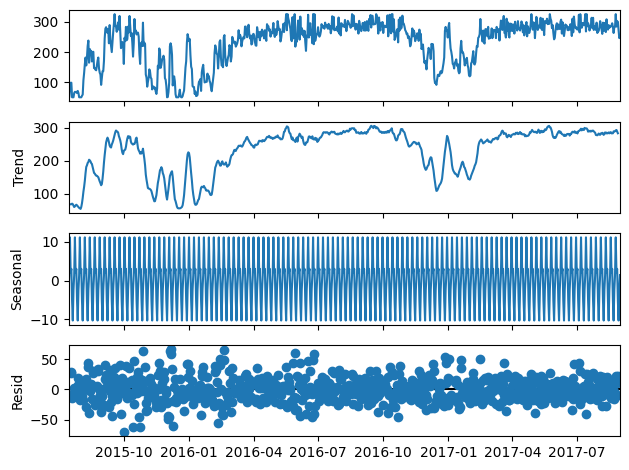

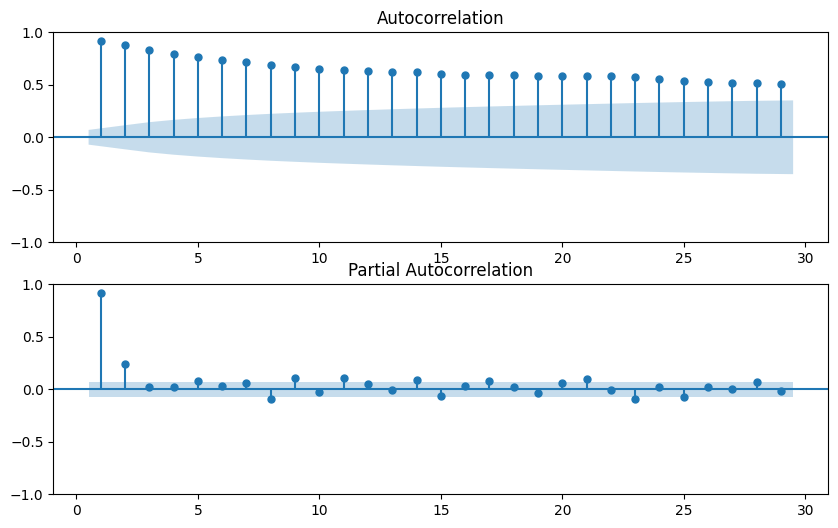

In [ ]:
def adf_test(col):
   """
   adf_test: calculates the Augmented Dickey Fuller test for the passed column
   """
   # adf test [In-Text Citation: (GeeksforGeeks, 2022)]
   adf_results = adfuller(col)
   alpha = 0.05
   print(f"Augmented Dickey-Fuller Test")
   print(f"ADF Stat: {adf_results[0]}")
   print(f"p-value: {adf_results[1]}")
   print('Critical Values:')
   for k, v in adf_results[4].items():
      print('\t%s: %.3f' % (k, v))
   if adf_results[1] <= alpha:
      print("The time series is " + text.BOLD +  "stationary" + text.END + " since the p-value is <= 0.05")
      return True
   else:
      print("The time series is " + text.BOLD +  "nonstationary" + text.END + " since the p-value >= 0.05")
      return False
def explore_arima(hotel_data,):
   """
   arima: does an arima forecast
   """
   stationary_data = hotel_data
   while not(adf_test(stationary_data.values)):
      stationary_data = stationary_data.diff()
      stationary_data = stationary_data.iloc[1:]
   print()
   # graphing
   decompose_result = seasonal_decompose(stationary_data, model='additive')
   decompose_result.plot()
   plt.show() 
   fig, axs = plt.subplots(2)
   fig.set_size_inches(10, 6)
   plot_acf(stationary_data, ax=axs[0], zero=False)
   plot_pacf(stationary_data, ax=axs[1], zero=False)
   plt.show()

explore_arima(city_occupancy)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Seasonal decomposition results in four separate graphs, the top illustrates the
stationary time series, and the bottom three show the time series when it’s individual
elements, trend, seasonality, and residual values, are broken down. There is a very tight
seasonality to the time series that, when zoomed in, shows a seasonal period, or <i>m</i> value,
of seven days.

&nbsp; &nbsp; Looking at the trend graph confirms the previously detected annual seasonal period
with a rising trend. For the model, the second seasonal pattern of 365 days will be
accounted for as exogenous variables. The last graph, the residual graph, represents the
“random variation” of values left when the trend and seasonal patterns are removed
(Malkari, 2023). As there is no discernible pattern in these data points, there is nothing of
note to consider.</p>

<img src="Images/Zoom in Seasonal City.png" alt="Visual of Weekly Seasonality">

<p>&nbsp; &nbsp; The next graphs display the autocorrelation (ACF) and partial autocorrelation (PACF)
functions, which are useful in identifying patterns in the time series. There are two significant spikes for the first couple of values in the partial autocorrelation plot meaning the best <i>p</i> value is possibly between zero to two. The
autocorrelation plot shows data points that are slowly declining which, according to Kis
(2024), suggests a time series with a long-term dependency such as the annual
seasonality. Typically, the <i>q</i> value is determined by analyzing spikes in the ACF plot, but the
pattern displayed here implies that the <i>q</i> value would need to be manually tested by
comparing model scores with different <i>q</i> values. <i>P</i> and <i>Q</i> values are found in a similar
fashion to their lowercase counter parts by looking for spike at lags of m meaning, for this
time series, at seven, fourteen, twenty-one, and so on. There are practically no spikes at
lags of seven for the PACF graph and only spikes for every lag in the ACF graph. Without the
ARIMA parameter tuner, <i>P</i> and <i>Q</i> too would require manual testing. For the last SARIMAX
variable, <i>D</i>, Kalyvas (2024) recommends setting the value to one “if the series has a stable
seasonal pattern over time”. As shown in the decomposition graph, there is a stable weekly
pattern so <i>D</i> should be one. In summary, these are SARIMAX values that could point
towards the best forecasting model:
</p>
<table>
<thead>
    <th>SARIMAX Variable</th>
    <th>Possible Values</th>
</thead>
<tbody>
<tr>
<th><i>p</i></th>
<td>0 - 2</td>
</tr>
<tr>
<th><i>d</i></th>
<td>0</td>
</tr>
<tr>
<th><i>q</i></th>
<td>Would require manual testing</td>
</tr>
<tr>
<th><i>P</i></th>
<td>Would require manual testing</td>
</tr>
<tr>
<th><i>D</i></th>
<td>1</td>
</tr>
<tr>
<th><i>Q</i></th>
<td>Would require manual testing</td>
</tr>
<tr>
<th><i>m</i></th>
<td>7</td>
</tr>
<tr>
<th>Exogeneous Values</th>
<td>365 day period</td>
</tr>
</tbody>
</table>
<h4>Resort Time Series Analysis</h4>
<p>&nbsp; &nbsp; Given that the city and resort hotels had similar shapes when comparing their
normalized values, the SARIMAX values for the resort time series will likely look very similar
to the city time series. Performing an ADF test on this dataset reveals a lack of stationarity
remedied by differentiating the dataset once meaning <i>d</i> will be equal to one for this set.



Augmented Dickey-Fuller Test
ADF Stat: -1.8730228858123337
p-value: 0.3448564498490519
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
The time series is nonstationary since the p-value >= 0.05
Augmented Dickey-Fuller Test
ADF Stat: -10.071183852386463
p-value: 1.2577441215280128e-17
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
The time series is stationary since the p-value is <= 0.05



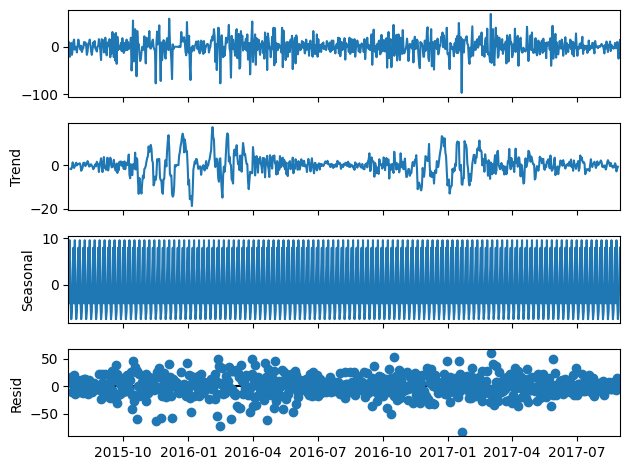

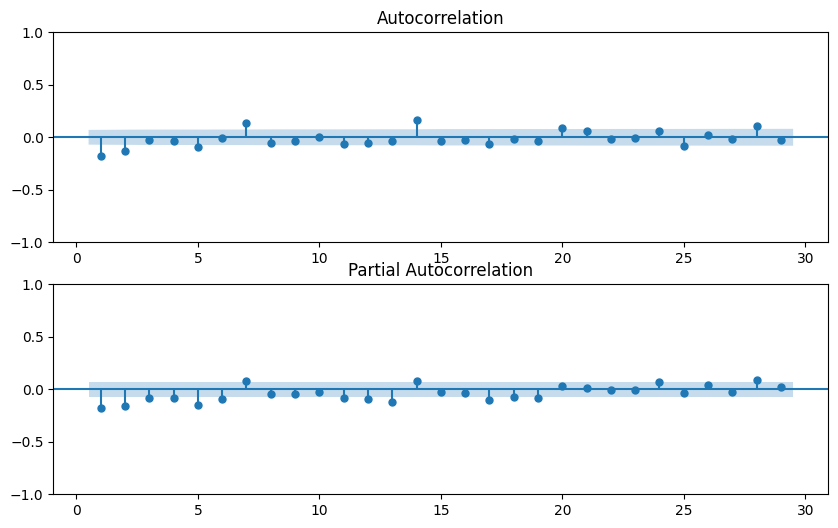

In [27]:
explore_arima(resort_occupancy)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The resort hotel does contain the same consistent seasonality of seven days with a
second seasonality of 365 days so the m, D and exogeneous variables will be the same as
the city data. The positive trend is also present but less noticeable than that of the other
hotel.

&nbsp; &nbsp; The ACF graph does have spikes at the seasonal lags of seven and fourteen hinting
at Q value ranging from zero to two. Aside from those peaks, the ACF graph cuts off after
two, so potential candidates for q are also between zero and two. There aren’t strong spikes
at seasonal lags for the PACF graph, however the values are flipped in an opposite direction
at lags seven and fourteen in comparison to the other lags. This is a significant enough
factor to consider P to be between zero and two. The beginning of this graph has many
small spikes indicating potential p values could range anywhere from zero to six. Here is a
table recapping the potential values of the resort data SARIMAX:</p>
<table>
<thead>
    <th>SARIMAX Variable</th>
    <th>Possible Values</th>
</thead>
<tbody>
<tr>
<th><i>p</i></th>
<td>0 - 6</td>
</tr>
<tr>
<th><i>d</i></th>
<td>1</td>
</tr>
<tr>
<th><i>q</i></th>
<td>0 - 2</td>
</tr>
<tr>
<th><i>P</i></th>
<td>0 - 2</td>
</tr>
<tr>
<th><i>D</i></th>
<td>1</td>
</tr>
<tr>
<th><i>Q</i></th>
<td>0 - 2</td>
</tr>
<tr>
<th><i>m</i></th>
<td>7</td>
</tr>
<tr>
<th>Exogeneous Values</th>
<td>365 day period</td>
</tr>
</tbody>
</table>
<h4>Time Series Forecast</h4>
<p>&nbsp; &nbsp; With the analysis completed, the datasets are now ready to begin the SARIMAX
forecasting process. The data, as it was with the neural network, is split into training and
testing partitions with 80% of the data used towards training the model.

&nbsp; &nbsp; To include exogenous values in the model, Fourier terms need to be generated. As
Nick T. (2024) puts it, these terms are “mathematical constructs…which represent periodic
functions as sums of sine and cosine waves.” They are effective at capturing complex and
multiple seasonality and enable ARIMA models to run faster than if the long-term
seasonality is used as the m variable. One disadvantage of Fourier terms is the assumption
that the seasonal periodicity is fixed, but as the hotel industry has constant annual
patterns this is of no issue (G. Smith, n.d.). The number of Fourier terms for this model was
determined by manually testing different values and their impact on the visualization and
the MAPE score of the forecast. For both city and resort hotels, 11 terms provided the best
scoring without overfitting to previous data. These terms are created using the
FourierFeaturizer function from the pmdarima library and are generated for the entire
length of the time series and the forecasted days (935 days total).

&nbsp; &nbsp; Next, the auto_arima function is run on the training set with the exogenous Fourier
terms and a predetermined <i>D</i> value of one and m value of seven. Auto_arima will estimate
the best d value and test different <i>p</i>, <i>q</i>, <i>P</i>, and <i>Q</i> variables to see which model has the best
AIC (Akaike Information Criterion) score. After that, the testing and training values are
predicted using this model.

&nbsp; &nbsp; Below is the best resulting model with an AIC score of 5978 and visual forecast of the city
hotel occupancy using the SARIMAX model.
</p>

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6728.178, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6063.481, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=6268.797, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6727.181, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6221.292, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5994.321, Time=0.55 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=6593.249, Time=0.65 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5987.793, Time=0.96 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=6062.583, Time=0.44 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5985.618, Time=0

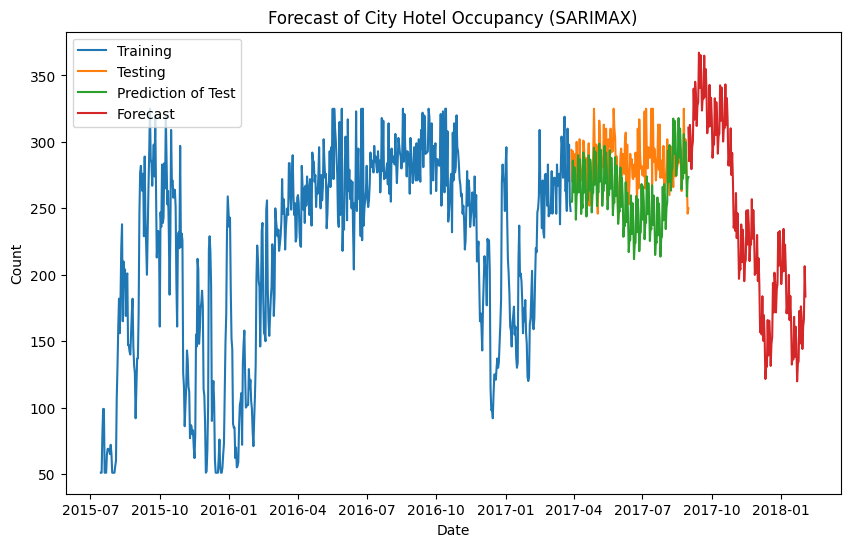

In [29]:
def arima(hotel_data, type_name, arima_values):
   """
   arima: does an arima forecast
   """
   # make sarima model
   split_location = int(len(hotel_data)*0.8) # the index where the data is split for testing/training
   y_len = len(hotel_data) - split_location
   training = hotel_data[:split_location]
   testing = hotel_data[split_location:]
   time_length = np.arange(len(hotel_data)+y_len)

   exog = []
   for i in range(len(arima_values.fourier)):
      fourier = FourierFeaturizer(arima_values.season[i], arima_values.fourier[i]).fit_transform(time_length)[1]
      if i == 0:
         exog = fourier.to_numpy()
      else:
         exog = np.concatenate((exog, fourier.to_numpy()), axis=1)

   # use auto arima to testing best model
   best_model = auto_arima(training.values, start_p=1, start_q=1, test='adf', D=arima_values.D, m=arima_values.m,
               exogenous=exog[:split_location], seasonal=True, trace=True, suppress_warnings=True)
   best_model.fit(training.values, X=exog[:split_location])
   print(best_model.summary())

   # compare against testing data
   # predict both test and forecast at once
   both_predictions = best_model.predict((y_len*2), X=exog[split_location:])
   # sort the predictions
   forecast = pd.Series(both_predictions[y_len:], index = pd.date_range(start = hotel_data.index[-1], periods=y_len))
   test_predictions = pd.Series(data=both_predictions[:y_len], index=testing.index)
   mape = mean_absolute_percentage_error(hotel_data[split_location:], test_predictions)
   mae = mean_absolute_error(hotel_data[split_location:], test_predictions)
   rmse = root_mean_squared_error(hotel_data[split_location:], test_predictions)
   print("\nModel Metrics:")
   print(f"Mean Absolute Percentage Error (MAPE): {round((mape * 100), 3)} %")
   print(f"Mean Absolute Error (MAE): {mae}")
   print(f"Root Mean Squared Error: {rmse}")
   print()

   # plot forecast and actual values 
   graph_forecast_results(training, testing, test_predictions, forecast, type_name, "SARIMAX")
   plt.show()

   return test_predictions, forecast, round((mape * 100), 3)

(c_arima_test, c_arima_forecast, 
 c_arima_mape) = arima(city_occupancy, 'City', arima_values([11], [365], 1, 7))

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The resulting model has a <i>p</i> value of three which is higher than the predicted range,
a <i>P</i> value of two, and a <i>q</i> and <i>Q</i> value of zero. The testing predictions do dip further than the
actual values but maintain a MAPE score of 9.779%. Visually, the predictions peak at the
start of the forecast but follow the same off-season dip and upward trend as the previous
years. Overall, the predictions do not overfit the data and have a similar daily fluctuation as
the actual data itself.

&nbsp; &nbsp; Below are the forecasting results for the occupancy of resort hotels. This
model has an AIC scoring of 5479.
</p>

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=6113.959, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5524.998, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=5672.119, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=6112.026, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=5688.526, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5483.947, Time=0.39 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=5986.133, Time=0.33 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5482.366, Time=0.48 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=5525.949, Time=0.20 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5483.252, Time=0

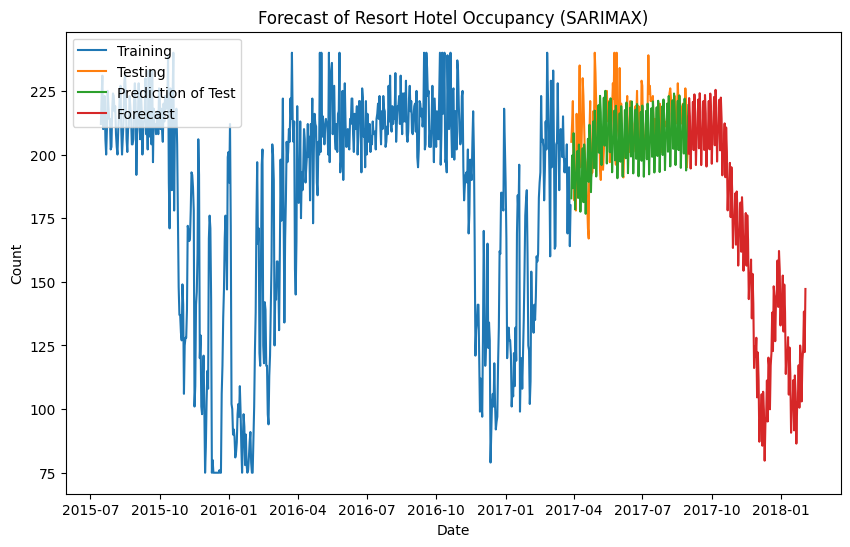

In [30]:
(r_arima_test, r_arima_forecast, 
 r_arima_mape) = arima(resort_occupancy, 'Resort', arima_values([11], [365], 1, 7))

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; This best model contains values where <i>p</i> and <i>q</i> are one, <i>P</i> is two, and <i>Q</i> is zero.
These variables are all within the range of their predicted values but <i>d</i>, however, is not.
Auto_arima has an optional parameter that can detect whether a time series requires
differentiation using the ADF test and therefore determines what the best <i>d</i> value would be.
Curiously enough, this optimizer decided the series does not require differentiation in
contrast to what the independent ADF test predicted, so <i>d</i> is zero. The forecasting results
themselves are very faithful to the original data having a MAPE score of 5.638%. With such
a low score, there is a reasonable concern that the model might be overfitted towards the
previous data but visually the prediction is excellent.</p>
<h2>Results and Implications</h2>
<h3>A Summary of Results</h3>
<h4>City Forecast</h4>

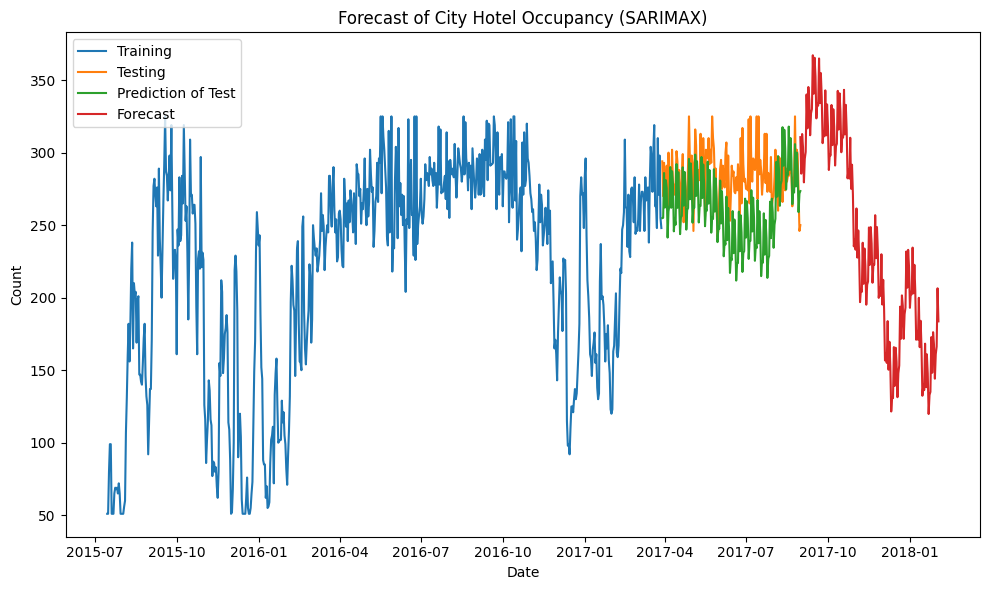

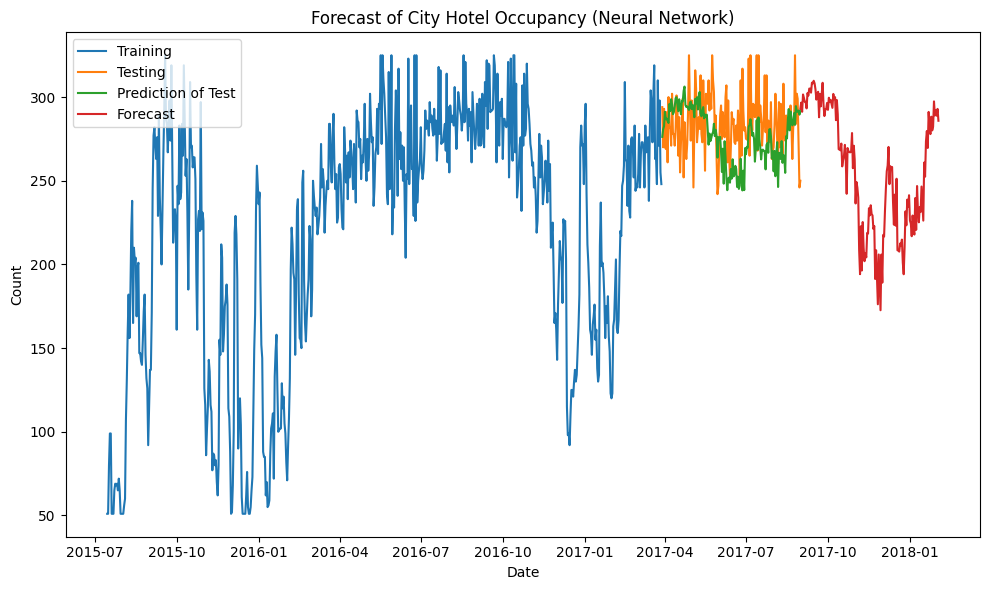

SARIMAX MAPE: 9.779 %
Neural Network MAPE: 12.982 % 


In [36]:
def compare_forecasts(hotel_data, type_name, arima_test, arima_forecast, arima_mape, neural_test, neural_forecast, neural_mape):
   """
   compare_forecasts: compares the results of the two forecasting tests
   """
   split  = int(len(hotel_data) * 0.8)
   training = hotel_data[:split]
   testing = hotel_data[split:]
   
   graph_forecast_results(training, testing, arima_test, arima_forecast, type_name, "SARIMAX")
   plt.tight_layout()
   graph_forecast_results(training, testing, neural_test, neural_forecast, type_name, "Neural Network")
   plt.tight_layout()
   plt.show()
   print(f"SARIMAX MAPE: {arima_mape} %")
   print(f"Neural Network MAPE: {neural_mape} % ")

compare_forecasts(city_occupancy, 'City', c_arima_test, c_arima_forecast, c_arima_mape, c_neural_test, c_neural_forecast, c_neural_mape)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; According to the MAPE scores, the SARIMAX model is less prone to errors when
compared to the actual data. Looking at the plots, it is clear that while the neural network
understands the general pattern and direction of the time series, it lacks the volatility seen
in the SARIMAX plot; this is why the neural network scores a higher error average. In relation
to the research hypotheses, both methodologies have a MAPE score of less than 20%,
(9.779% for SARIMAX and 12.982% for the neural network) confirming the alternative
hypothesis for the city hotel time series.</p>
<h4>Resort Forecast</h4>

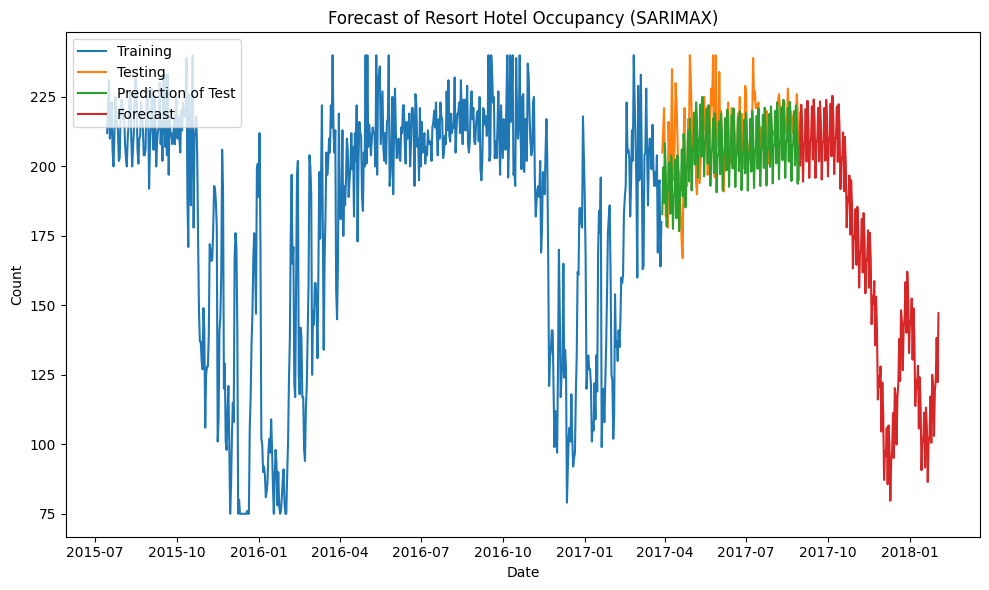

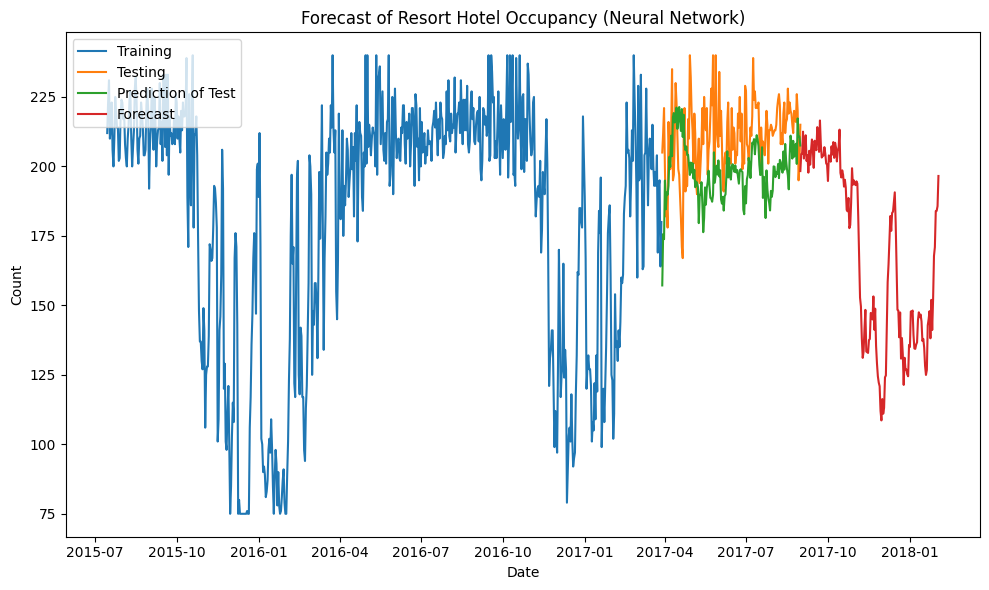

SARIMAX MAPE: 5.368 %
Neural Network MAPE: 25.187 % 


In [37]:
compare_forecasts(resort_occupancy, 'Resort', r_arima_test, r_arima_forecast, r_arima_mape, r_neural_test, r_neural_forecast, r_neural_mape)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; As was the case with the city hotel time series, the resort hotel SARIMAX method
outperformed the neural network because of its tight seasonal pattern. Only the SARIMAX
fulfills the requirement of the alternative hypothesis at a MAPE of 5.368% while the neural
network misses it with a score of 25.187%.</p>
<h3>Limitations</h3>
<p>&nbsp; &nbsp; The time series forecasting process was, especially for the creation of the neural
networks, limited by the amount of data. The models would greatly benefit from more time
periods as the seasonality and trend patterns of the model are complex. Additionally, the
date range of study was a restricted version of the date range of the entire dataset because
of missing information. There are reservations that exist before and after the dataset that
occur on the same days as reservations within the dataset. The beginning of the time series
for the city hotel occupancy starts very low for this reason.

&nbsp; &nbsp; This study is also limited by the anonymization of location. Using exogenous
variables in SARIMAX models enables the analyst to incorporate outside influencing factors
into the predictive models. The hotel’s whereabouts, relevant events, seasonal behaviors,
or locational attractions cannot be factored in as potential exogenous values without
knowing the location.</p>
<h3>Recommended Course of Action</h3>
<p>&nbsp; &nbsp; The SARIMAX model meets the requirements of the alternative hypothesis and
outperforms the neural network model in both time series instances. The best course of
action would be to use SARIMAX in future predictive projects as it is more suited for this
company’s needs. Obtaining more data over time as well as discovering where the hotels
are located is another viable path in overcoming the limitations imposed on the study. As a
practical suggestion, both the city and resort hotels should maintain their current business
practices as there is an increasing trend to the daily occupancy of the hotels.</p>
<h3>Approaches for Further Study</h3>
<p>&nbsp; &nbsp; While the neural network did not perform as well as expected for this project, there
are still many opportunities for model refinement by testing out different model layers. For
example, the Gated Recurrent Unit (GRU) and Convolutional Neural Network (CNN) layer
types are well-suited for time series as they are equipped to process sequential data like
LSTM layers. Neural networks are incredibly flexible and allow for endless network layer
combinations; longer optimization testing periods with new layer types could even improve
its performance over SARIMAX.

&nbsp; &nbsp; Additionally, time series forecasting is not limited to just these two models. Other
popular models including Bayesian Structural Time Series (BSTS), Prophet, DeepAR, and N-
BEATS are all viable options for further study in time series forecasting (Regunath, 2024). As
every model has its strengths and weaknesses, averaging the results of a few predictive
models might even be more accurate than the individual models themselves.</p>

<h3>Sources</h3>
<p>
A, K. (2024, October 3). ARIMA vs SARIMA vs SARIMAX vs Prophet for Time Series
Forecasting. Medium. <a href="https://kishanakbari.medium.com/arima-vs-sarima-vs-sarimax-vs-prophet-for-time-series-forecasting-a59d3cc932a3">https://kishanakbari.medium.com/arima-vs-sarima-vs-sarimax-vs-prophet-for-time-series-forecasting-a59d3cc932a3</a>

Bevilacqua, N. (2024, September 18). Why does Winsorization matter in A/B testing?
Kameleoon. https://www.kameleoon.com/blog/why-does-winsorization-matter-ab-testing

Brownlee, J. (2020, August 28). How to Develop LSTM Models for Time Series Forecasting.
Machine Learning Mastery. https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Chug, A. (2025, May 28). What is LSTM - Long Short Term Memory? GeeksforGeeks.
https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

Donges, N. (2023, August 9). Pros and Cons of Neural Networks. Experfy.
https://resources.experfy.com/ai-ml/pros-and-cons-of-neural-networks/

Edmiston, M., Coker, S., Jamilla, S., & Tshabalala, T. (2021, September 30). The Pros and
Cons of Open Data. MERL Center. https://merlcenter.org/guides/pros-and-cons-of-open-data/

EHL Insights. (2025, January 23). Key Hospitality Data & Industry Statistics to Watch for
2025. EHL Insights. https://hospitalityinsights.ehl.edu/hospitality-industry-statistics

Ford, C. (2017, January 5). The Wilcoxon Rank Sum Test. University of Virginia Library.
https://library.virginia.edu/data/articles/the-wilcoxon-rank-sum-test

Foreman, D. (2025, April 15). Busy season Vs low season profits: A guide to seasonal hotel
revenue. Lighthouse. https://www.mylighthouse.com/resources/blog/busy-season-vs-low-season-profit

G. Smith, T. (n.d.). pmdarima.preprocessing.FourierFeaturizer. Pmdarima. https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.preprocessing.FourierFeaturizer.html

Gilbert, L. (2023, August 28). MAPE vs MAE: Which Metric is Better? Medium.
https://medium.com/trusted-data-science-haleon/mape-vs-mae-which-metric-is-better-68dd559cbfb1

Hoque, M. (2023, May 14). Demystifying Neural Network Normalization Techniques.
Medium. https://medium.com/@minh.hoque/demystifying-neural-network-normalization-techniques-4a21d35b14f8

Hyndman, R. (n.d.). 9.1 Stationarity and differencing. OTexts.
https://otexts.com/fpp3/stationarity.html

Kalyvas, V. (2024, April 26). Time Series Episode 1: How to select the correct SARIMA
parameters. LinkedIn. https://www.linkedin.com/pulse/time-series-episode-1-how-select-correct-sarima-vasilis-kalyvas-jqcjf/

Kis, A. (2024, July 26). Understanding Autocorrelation and Partial Autocorrelation
Functions (ACF and PACF). Medium.
https://medium.com/@kis.andras.nandor/understanding-autocorrelation-and-partial-autocorrelation-functions-acf-and-pacf-2998e7e1bcb5

Kolassa, S. (2023, March 7). ARIMA or SARIMA scale and normalize data. StackExchange.
https://stats.stackexchange.com/questions/608658/arima-or-sarima-scale-and-normalize-data

Lacalle, E. (2025, May 14). Hotel occupancy rate: What it is and how to calculate it. Mews.
https://www.mews.com/en/blog/hotel-occupancy-rates

Leonardo, A. (2016, May 17). Winsorize: Definition, Examples in Easy Steps. Statistics How
To. https://www.statisticshowto.com/contact/

Malkari, N. (2023, April 15). Seasonal Decomposition. Medium.
https://medium.com/@nikhilmalkari18/seasonal-decomposition-425a2d7490e8

Patil, P. (2023, September 23). Outlier Detection and Removal using the IQR Method.
Medium. https://medium.com/@pp1222001/outlier-detection-and-removal-using-the-iqr-method-6fab2954315d

Pramoditha, R. (2012, November 23). How large does the test data set need to be?
Medium. https://medium.com/data-science-365/how-large-does-the-test-data-set-need-to-be-7181922d5dda

Regunath, G. (2024, June 21). 10 Incredibly Useful Time Series Forecasting Algorithms.
Advancing Analytics. https://www.advancinganalytics.co.uk/blog/2021/06/22/10-incredibly-useful-time-series-forecasting-algorithms

Saxena, P. (2024, February 11). Quantile Quantile plots. GeeksforGeeks.
https://www.geeksforgeeks.org/quantile-quantile-plots/

Shukla, P. (2025, February 2). Sigmoid Function. GeeksforGeeks.
https://www.geeksforgeeks.org/derivative-of-the-sigmoid-function/

T, N. (2024, November 7). Understanding Fourier Terms for Seasonality in Time Series
Analysis. Medium. https://python.plainenglish.io/understanding-fourier-terms-for-seasonality-in-time-series-analysis-a43b4ddbfd9e

Vaj, T. (2024, September 18). When to use Mean/Median/Mode imputation: Medium.
https://vtiya.medium.com/when-to-use-mean-median-mode-imputation-b0fd6be247db
</p>